In [316]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import stats

In [317]:
train=pd.read_csv('train.csv',index_col = "Id")
test=pd.read_csv('test.csv',index_col = "Id")

In [318]:
train.head()

,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
Id,,,,,,,,,,,,,,,,,,,,,
1000,60,within an hour,0.67,0.00,f,2,t,-33.919223,151.251815,Apartment,...,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN
1001,243,within an hour,0.99,0.97,f,260,f,-33.851283,151.282158,House,...,9.0,10.0,9.0,10.0,9.0,t,strict_14_with_grace_period,f,f,0.63
1002,210,within a day,0.86,0.67,f,1,t,-33.893217,151.266498,Apartment,...,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,f,f,NaN
1003,111,within an hour,1.00,0.95,f,1,t,-34.042636,151.110000,Apartment,...,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1.15
1004,160,within an hour,1.00,1.00,t,1,t,-33.910701,151.178311,Apartment,...,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2.58


In [319]:
#Examine the missingness of the training data
train.isna().sum()

price                                 0
host_response_time                  454
host_response_rate                  454
host_acceptance_rate                356
host_is_superhost                     0
host_listings_count                   0
host_identity_verified                0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                             0
bedrooms                              3
beds                                  5
bed_type                              0
security_deposit                    374
cleaning_fee                        255
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating                241
review_scores_accuracy              243


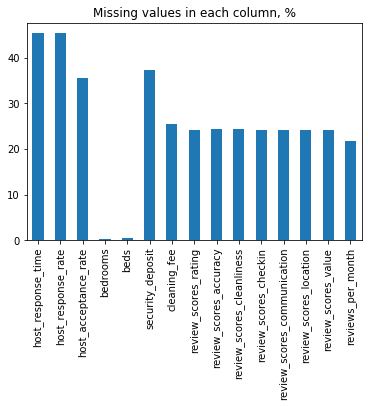

In [320]:
# Finding the na / missing values for each column
missing_values= train.isnull().mean()*100
missing_values_train= missing_values[missing_values > 0]
#Missing results
missing_values_train.plot.bar(title='Missing values in each column, %')

In [322]:
#Examine the missingness of the test data
test.isna().sum()

host_response_time                  480
host_response_rate                  480
host_acceptance_rate                361
host_is_superhost                     1
host_listings_count                   1
host_identity_verified                1
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                             1
bedrooms                              2
beds                                  7
bed_type                              0
security_deposit                    362
cleaning_fee                        272
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating                251
review_scores_accuracy              252
review_scores_cleanliness           252


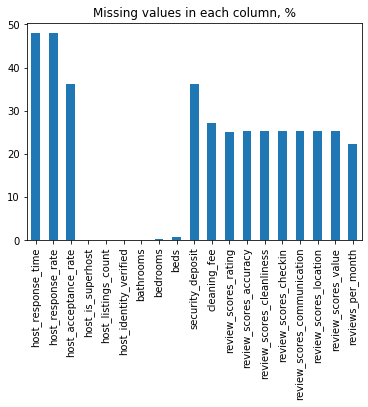

In [323]:
# Finding the na / missing values for each column
missing_values= test.isnull().mean()*100
missing_values_test= missing_values[missing_values > 0]
#Missing results
missing_values_test.plot.bar(title='Missing values in each column, %')

In [324]:
#Recode host_response_time to integers as it is a spectrum
train['host_response_time'].replace('within an hour', 1, inplace=True)
train['host_response_time'].replace('within a few hours', 2, inplace=True)
train['host_response_time'].replace('within a day', 3, inplace=True)
train['host_response_time'].replace('a few days or more', 4, inplace=True)
train['host_response_time'].fillna(0, inplace=True)

# Changing True to False
train['host_is_superhost'] = (train['host_is_superhost'] == 't').astype(int)
train['instant_bookable'] = (train['instant_bookable'] == 't').astype(int)
train['require_guest_phone_verification'] = (train['require_guest_phone_verification'] == 't').astype(int)
train['require_guest_profile_picture'] = (train['require_guest_profile_picture'] == 't').astype(int)
train['host_identity_verified'] = (train['host_identity_verified'] == 't').astype(int)

#Impute missing values using forward-fill method
train["host_response_rate"].fillna(0, inplace=True)
train['host_acceptance_rate'].fillna(0, inplace=True)
train['bathrooms'].fillna(0,inplace=True)
train['bedrooms'].fillna(0,inplace=True)
train['beds'].fillna(0,inplace=True)
train['security_deposit'].fillna(0,inplace=True)
train['cleaning_fee'].fillna(0,inplace=True)
train['reviews_per_month'].fillna(0,inplace=True)

# Deal with missing data by taking column mean
train['review_scores_rating'].fillna(np.mean(train['review_scores_rating']),inplace=True)
train['review_scores_accuracy'].fillna(np.mean(train['review_scores_accuracy']),inplace=True)
train['review_scores_cleanliness'].fillna(np.mean(train['review_scores_cleanliness']),inplace=True)
train['review_scores_checkin'].fillna(np.mean(train['review_scores_checkin']),inplace=True)                                      
train['review_scores_communication'].fillna(np.mean(train['review_scores_communication']),inplace=True)
train['review_scores_location'].fillna(np.mean(train['review_scores_location']),inplace=True)
train['review_scores_value'].fillna(np.mean(train['review_scores_value']),inplace=True)

In [325]:
#Recode host_response_time to integers as it is a spectrum
test['host_response_time'].replace('within an hour', 1, inplace=True)
test['host_response_time'].replace('within a few hours', 2, inplace=True)
test['host_response_time'].replace('within a day', 3, inplace=True)
test['host_response_time'].replace('a few days or more', 4, inplace=True)
test['host_response_time'].fillna(0, inplace=True)

# Changing True to False
test['host_is_superhost'] = (test['host_is_superhost'] == 't').astype(int)
test['instant_bookable'] = (test['instant_bookable'] == 't').astype(int)
test['require_guest_phone_verification'] = (test['require_guest_phone_verification'] == 't').astype(int)
test['require_guest_profile_picture'] = (test['require_guest_profile_picture'] == 't').astype(int)
test['host_identity_verified'] = (test['host_identity_verified'] == 't').astype(int)

#Impute missing values using forward-fill method
test['host_response_rate'].fillna(0, inplace=True)
test['host_listings_count'].fillna(0, inplace=True)
test['host_acceptance_rate'].fillna(0, inplace=True)
test['host_is_superhost'].fillna(0,inplace=True)
test['host_identity_verified'].fillna(0,inplace=True)                                                                                
test['bathrooms'].fillna(0,inplace=True)
test['bedrooms'].fillna(0,inplace=True)
test['beds'].fillna(0,inplace=True)
test['security_deposit'].fillna(0,inplace=True)
test['cleaning_fee'].fillna(0,inplace=True)
test['reviews_per_month'].fillna(0,inplace=True)

# Deal with missing data by taking column mean
test['review_scores_rating'].fillna(np.mean(test['review_scores_rating']),inplace=True)
test['review_scores_accuracy'].fillna(np.mean(test['review_scores_accuracy']),inplace=True)
test['review_scores_cleanliness'].fillna(np.mean(test['review_scores_cleanliness']),inplace=True)
test['review_scores_checkin'].fillna(np.mean(test['review_scores_checkin']),inplace=True)                                      
test['review_scores_communication'].fillna(np.mean(test['review_scores_communication']),inplace=True)
test['review_scores_location'].fillna(np.mean(test['review_scores_location']),inplace=True)
test['review_scores_value'].fillna(np.mean(test['review_scores_value']),inplace=True)

## Location Variable

In [326]:
import numpy as np
#Conversion of Degrees into Radians
train['latitude'] = np.deg2rad(train['latitude'])
train['longitude'] = np.deg2rad(train['longitude'])

In [327]:
# deal with the location
lat=0.5898026048
lon=2.6404667374
dist = []
for col,row in train.iterrows():
    distance =np.sqrt(np.square((row['latitude']-lat))+np.square(row['longitude']-lon))
    dist.append(distance)
train['Distance'] = dist

Text(0.5, 1.0, 'Rating vs Age')

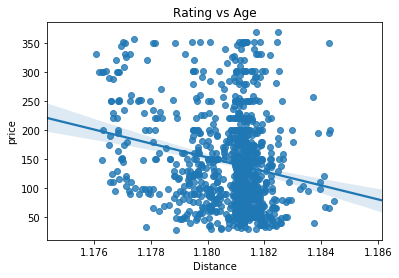

In [329]:
sns.regplot(x="Distance", y="price", data=train).set_title('Rating vs Age')
plt.savefig('Distance Correlation')

In [ ]:
#Dropping the Variables
train=train.drop(labels='latitude',axis=1)
train=train.drop(labels='longitude',axis=1)
train=train.drop(labels='Distance',axis=1)
test=test.drop(labels='latitude',axis=1)
test=test.drop(labels='longitude',axis=1)

In [330]:
# Encode smaller number of categorical variables for property type
train['property_type'] = np.where(train['property_type']=='House', "House", (np.where(train['property_type']=='Apartment', "Apartment", (np.where(train['property_type']=='Townhouse', "Townhouse", "Other")))))
test['property_type'] = np.where(test['property_type']=='House', "House", (np.where(test['property_type']=='Apartment', "Apartment", (np.where(test['property_type']=='Townhouse', "Townhouse", "Other")))))

In [332]:
pd.crosstab(index=train["property_type"],columns="count")

col_0,count
property_type,
Apartment,648
House,206
Other,116
Townhouse,30


In [333]:
# Encode smaller number of categorical variables for cancellation_policy
train['cancellation_policy'] = np.where(train['cancellation_policy']=='flexible', "flexible", (np.where(train['cancellation_policy']=='moderate', "moderate", "strict")))
test['cancellation_policy'] = np.where(test['cancellation_policy']=='flexible', "flexible", (np.where(test['cancellation_policy']=='moderate', "moderate", "strict")))

In [334]:
pd.crosstab(index=train["cancellation_policy"],columns="count")

col_0,count
cancellation_policy,
flexible,337
moderate,254
strict,409


In [335]:
# Encode smaller number of categorical variables for bed_type
train['bed_type'] = np.where(train['bed_type']=='Real Bed', "Real Bed", "others")
test['bed_type'] = np.where(test['bed_type']=='Real Bed', "Real Bed", "others")

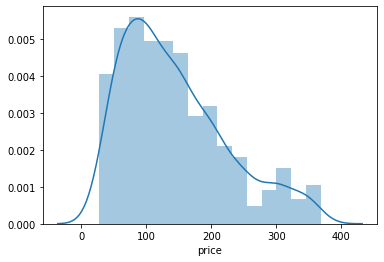

In [336]:
sns.distplot(train['price'])
plt.savefig('Distribution of price')

In [26]:
stats.skew(train['price'])

0.8325236836633354

In [27]:
stats.kurtosis(train['price'])

-0.029426880408119693

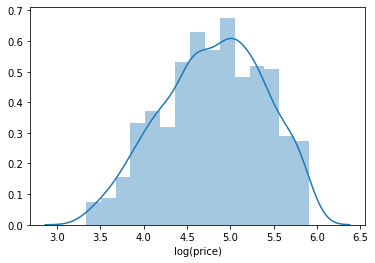

In [28]:
sns.distplot(np.log(train['price']))
plt.xlabel('log(price)')
plt.savefig('Distribution of log price')

In [29]:
stats.skew(np.log(train['price']))

-0.21236430624235111

In [30]:
stats.kurtosis(np.log(train['price']))

-0.659242212585867

In [23]:
#Plotting the relation between Price and the Independent Variables
independent_variables=['host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds',  'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month', 'distance', 'property_type_encoded',
       'cancellation_policy_encoded','bed_type_encoded']
dependent_variable=['price']

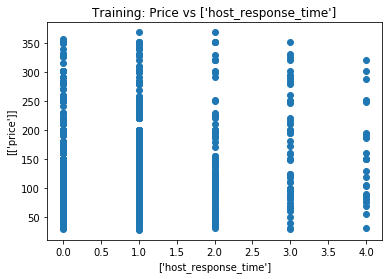

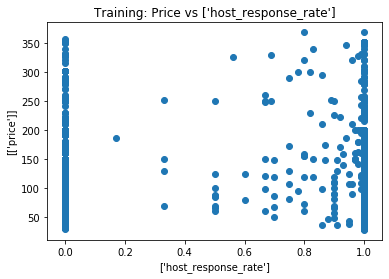

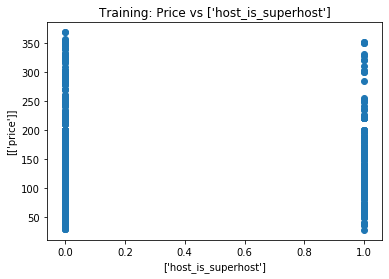

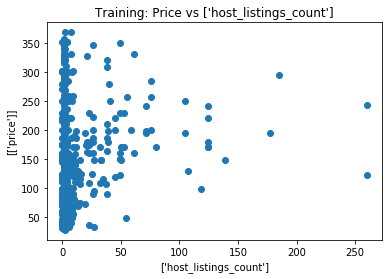

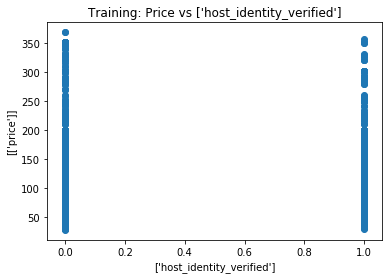

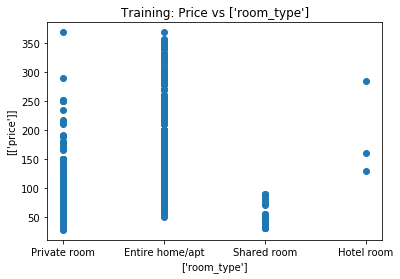

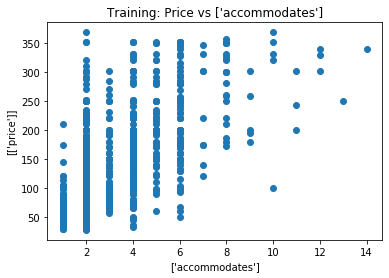

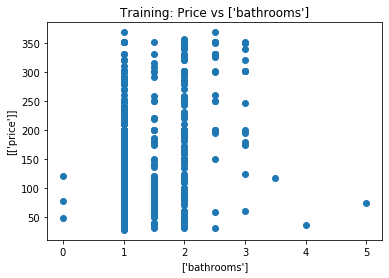

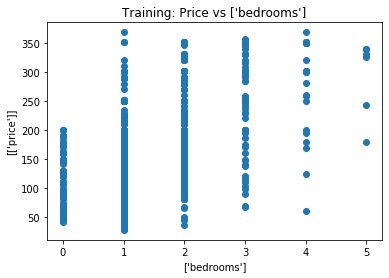

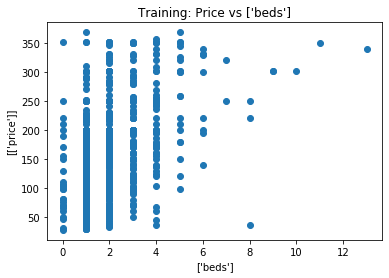

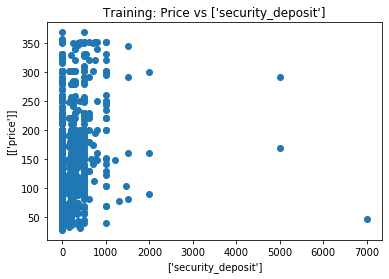

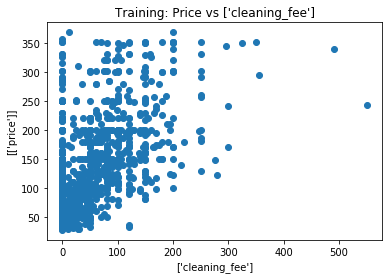

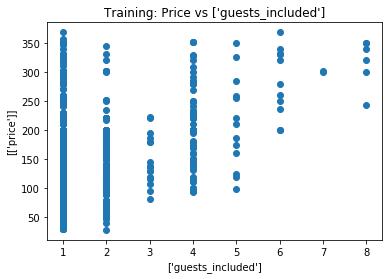

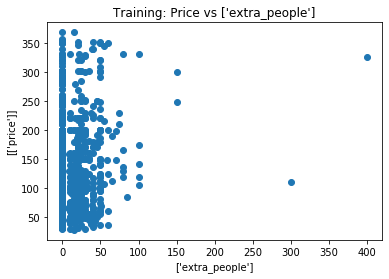

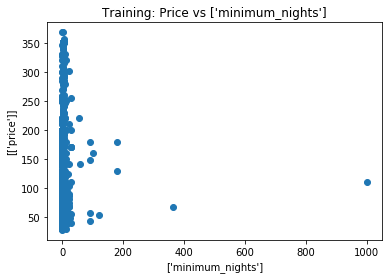

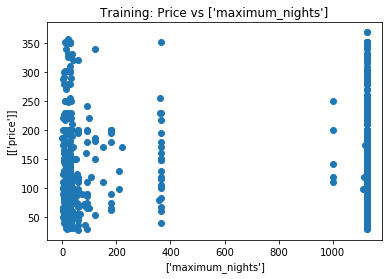

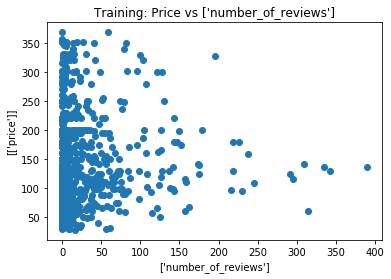

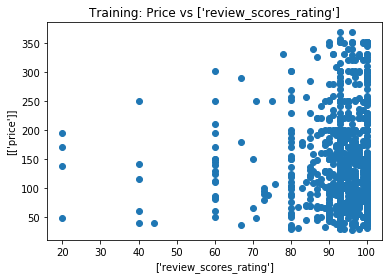

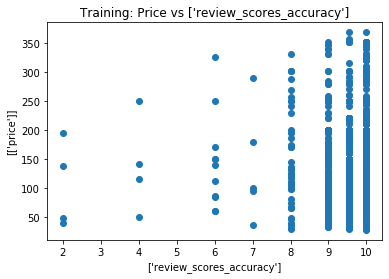

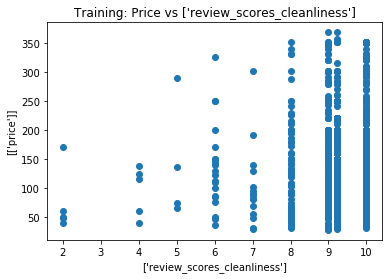

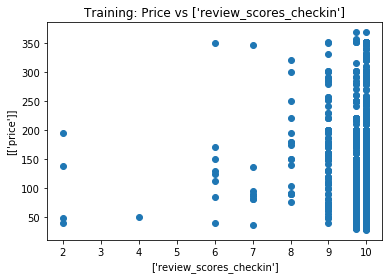

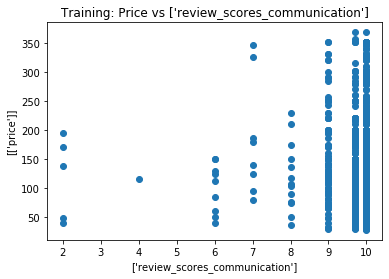

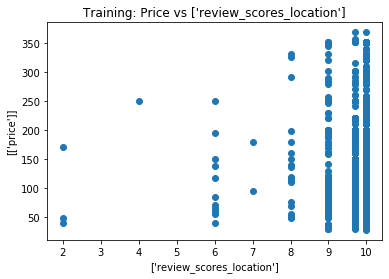

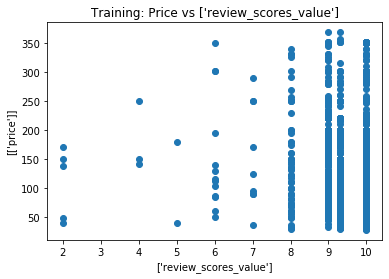

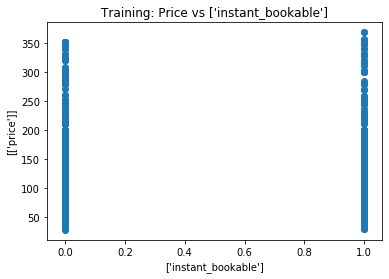

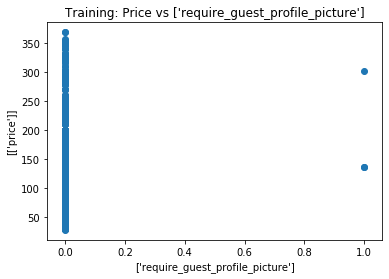

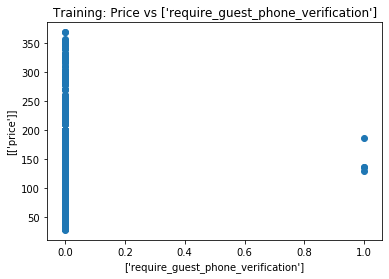

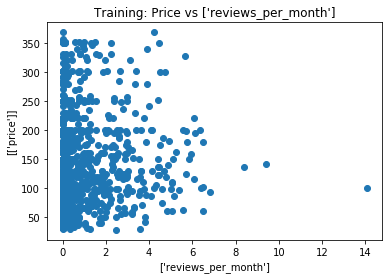

KeyError: 'distance'

In [24]:
for i in range(len(independent_variables)):
    plt.scatter(x=train[independent_variables[i]],y=train[dependent_variable])
    plt.xlabel(str([independent_variables[i]]))
    plt.ylabel(str([dependent_variable]))
    plt.title("Training: Price vs "+str([independent_variables[i]]))
    plt.show()

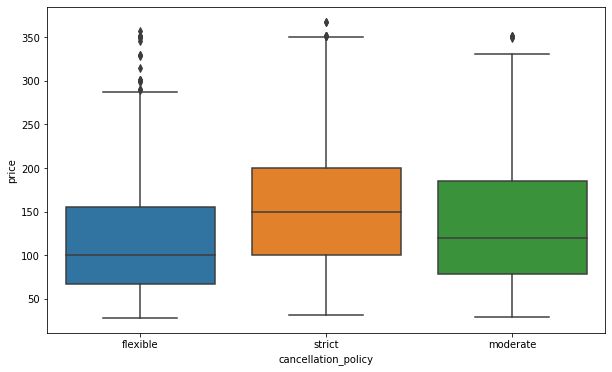

In [338]:
plt.figure(figsize=(10,6))
sns.boxplot(x="cancellation_policy", y="price", data=train)

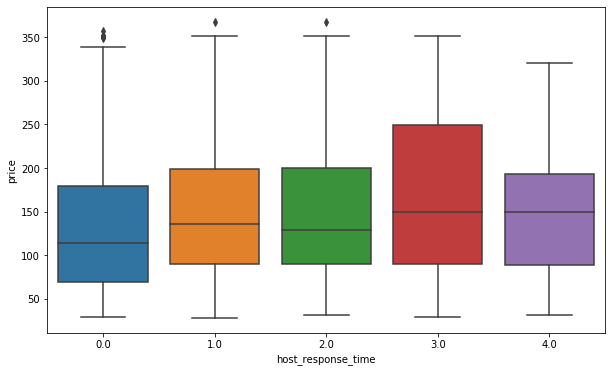

In [339]:
plt.figure(figsize=(10,6))
sns.boxplot(x="host_response_time", y="price", data=train)

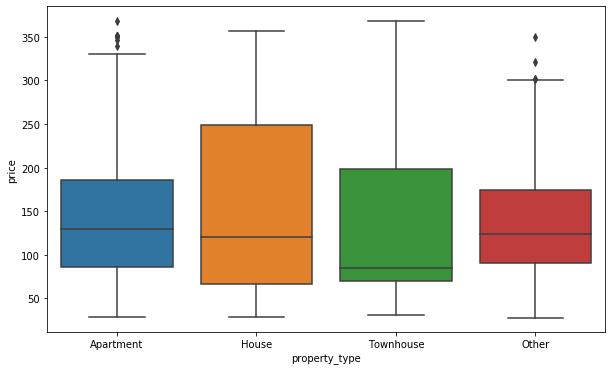

In [340]:
plt.figure(figsize=(10,6))
sns.boxplot(x="property_type", y="price", data=train)

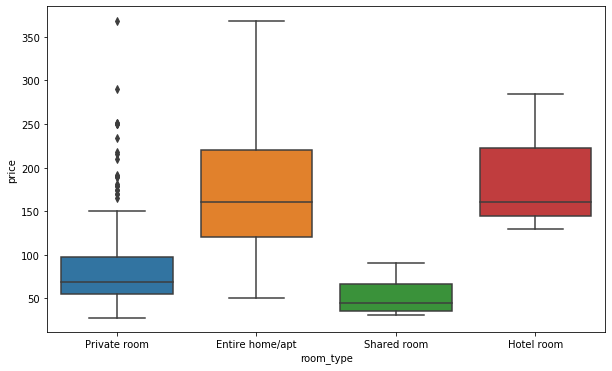

In [341]:
plt.figure(figsize=(10,6))
sns.boxplot(x="room_type", y="price", data=train)

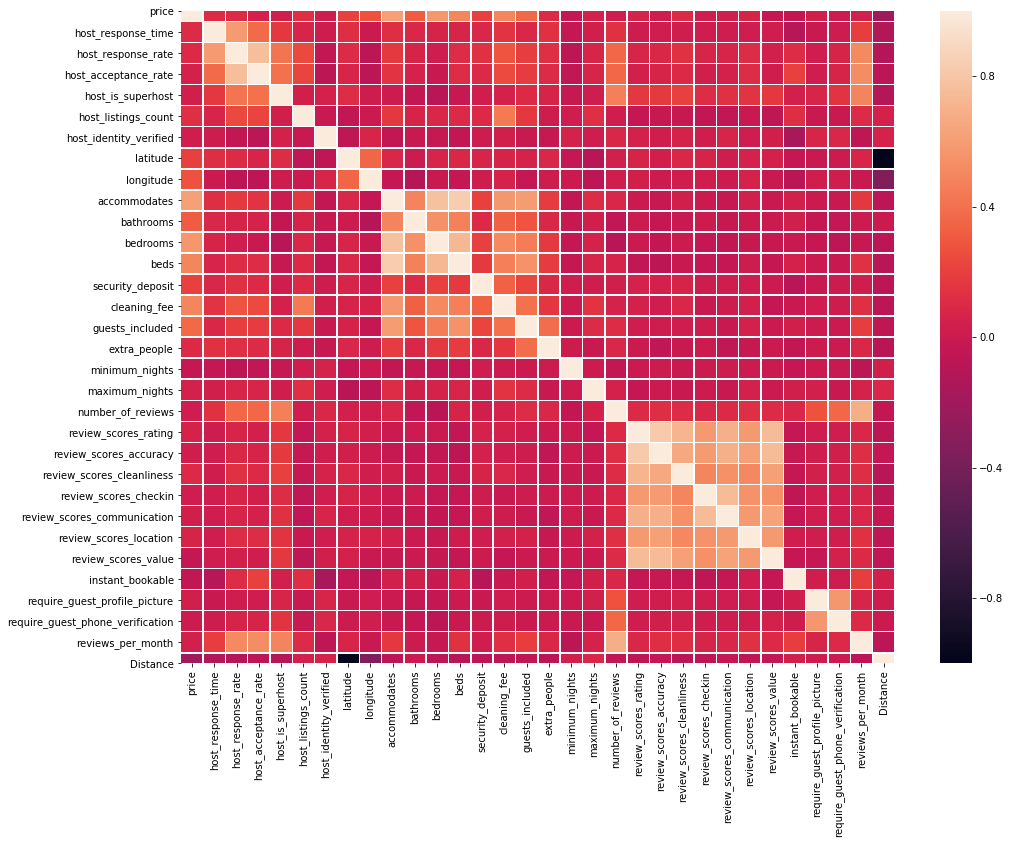

In [337]:
fig, ax = plt.subplots(figsize=(16,12))
corr = train.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)

In [75]:
corr[['price']]

,price
price,1.000000
host_response_time,0.107181
host_response_rate,0.100241
host_acceptance_rate,0.049855
host_is_superhost,0.032873
host_listings_count,0.126808
host_identity_verified,0.023648
accommodates,0.613239
bathrooms,0.315628
bedrooms,0.568880


In [123]:
#Getting dummy variables
train=pd.get_dummies(data=train,
              columns=['host_response_time',
                      'property_type','room_type','bed_type','cancellation_policy'],
              drop_first=True)

test=pd.get_dummies(data=test,
              columns=['host_response_time',
                      'property_type','room_type','bed_type','cancellation_policy'],
              drop_first=True)

In [ ]:
#Converting Price into a Log Form
y_train_log=np.log(train['price'])

In [124]:
x_train=train.iloc[:,1:]

y_train=y_train_log

In [125]:
#Dropping the Variables
x_train.drop('review_scores_rating',axis=1, inplace=True)
x_train.drop('review_scores_accuracy',axis=1, inplace=True)
x_train.drop('review_scores_cleanliness',axis=1, inplace=True)
x_train.drop('review_scores_checkin',axis=1, inplace=True)
x_train.drop('review_scores_communication',axis=1, inplace=True)
x_train.drop('review_scores_location',axis=1, inplace=True)
x_train.drop('review_scores_value',axis=1, inplace=True)
x_train.drop('reviews_per_month',axis=1, inplace=True)
x_train.drop('number_of_reviews',axis=1, inplace=True)

test.drop('review_scores_rating',axis=1, inplace=True)
test.drop('review_scores_accuracy',axis=1, inplace=True)
test.drop('review_scores_cleanliness',axis=1, inplace=True)
test.drop('review_scores_checkin',axis=1, inplace=True)
test.drop('review_scores_communication',axis=1, inplace=True)
test.drop('review_scores_location',axis=1, inplace=True)
test.drop('review_scores_value',axis=1, inplace=True)
test.drop('reviews_per_month',axis=1, inplace=True)
test.drop('number_of_reviews',axis=1, inplace=True)

# OLS

In [252]:
X_train = train[['accommodates','bedrooms','beds','cleaning_fee','guests_included','bathrooms']]
y_train = train["price"]

# Create some test data
X_test = test[['accommodates','bedrooms','beds','cleaning_fee','guests_included','bathrooms']]

In [253]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()

In [254]:
ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)
print(y_pred_ols)

[ 89.16262423 106.22738675  84.01450649 106.22738675 234.09775141
 170.61991878 153.29285621 136.73947708 115.64048064 126.82205949
 106.22738675 232.30011369 113.28720717 100.92713108  96.18929635
  98.57571812 100.92713108 106.22738675 106.38892768 102.39726296
 234.90968965 168.7998029   72.66814848  89.16262423 123.10872356
 109.75729696 152.66338519 183.50237174 115.78183786 312.15261546
  96.33957377 128.58348475 114.46384391 106.22738675 192.18039969
 125.3090856  113.07206354 101.09945273 152.96357875  98.52238611
 120.8087821  106.22738675 129.76012148 108.72537666  93.86917118
 242.74848711 135.20879406 106.22738675 267.83717715 155.65318937
 246.66679555  84.40274528 115.19890985 179.97246153 117.99375412
 106.22738675  84.40274528 106.22738675  84.01450649 134.46666843
 343.56864305 106.22738675 136.22623317 110.9339337  187.03228195
 123.8769378  122.70030106 106.22738675 117.99375412 249.33914943
 211.4175068  106.22738675 124.17043295 155.01622641 219.4627934
 249.604698

In [255]:
submission = pd.DataFrame(np.c_[test.index, y_pred_ols], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('ols_submission.csv', index=False) 
print(submission)

      Id       price
0      0   89.162624
1      1  106.227387
2      2   84.014506
3      3  106.227387
4      4  234.097751
..   ...         ...
995  995  149.348619
996  996  134.486852
997  997  127.321798
998  998  164.386751
999  999  244.315223

[1000 rows x 2 columns]


## KNN

In [126]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [127]:
knn=KNeighborsRegressor()
tuning_parameters_dict = {
    'n_neighbors': np.arange(1, 51)}
num_folds = 5
scoring_metric = 'neg_mean_squared_error'
knn_search = GridSearchCV(
    knn,
    tuning_parameters_dict,
    cv = num_folds,
    scoring = scoring_metric, 
    return_train_score = False, # return the crossvalidation score for each parameter setting
    n_jobs = 4, # use multiple CPUs to run the crossvalidation
)

In [128]:
knn_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=4,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [129]:
knn_search.best_params_

{'n_neighbors': 11}

In [130]:
knn=knn_search.best_estimator_

In [131]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [132]:
y_pred_knn=knn.predict(test)

In [133]:
submission = pd.DataFrame(np.c_[test.index, y_pred_knn], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('knn.csv', index=False) 
print(submission)

      Id     price
0      0  4.291956
1      1  4.761077
2      2  4.562268
3      3  4.721418
4      4  5.304937
..   ...       ...
995  995  4.497055
996  996  5.275346
997  997  4.560112
998  998  4.772693
999  999  4.975562

[1000 rows x 2 columns]


# Ridge and Elastic Net

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import Pipeline

In [135]:
scaler = StandardScaler()

In [136]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [137]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(test)

## Ridge

In [140]:
alpha_list = np.logspace(-15, 15, 151, base = 2)

In [141]:
pipeline_ridge_steps = [
    ('scaler', StandardScaler()),
    ('estimator', RidgeCV(alphas = alpha_list, cv = 5)),
]

In [142]:
ridge_search = Pipeline(pipeline_ridge_steps)

In [143]:
ridge_search.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e...
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]),
                         cv=5, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring=None,
                         store_cv_values=False))],
         verbose=False)

In [144]:
ridge_best_model = ridge_search._final_estimator

In [145]:
ridge_best_model.alpha_

55.71523605095197

In [146]:
ridge_pipeline = [
    ('scaler', StandardScaler()),
    ('estimator', Ridge(alpha=ridge_best_model.alpha_))
]

In [147]:
ridge = Pipeline(ridge_pipeline)

In [148]:
ridge.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 Ridge(alpha=55.71523605095197, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [149]:
y_pre_ridge=ridge.predict(test)

In [151]:
submission = pd.DataFrame(np.c_[test.index, y_pre_ridge], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('ridge.csv', index=False) 
print(submission)

      Id     price
0      0  4.228410
1      1  4.209051
2      2  4.249762
3      3  4.288306
4      4  5.533774
..   ...       ...
995  995  4.952848
996  996  4.880795
997  997  4.480214
998  998  5.173197
999  999  5.283477

[1000 rows x 2 columns]


## Elastic Net

In [283]:
ll_ratio_list = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99]

In [284]:
pipeline_enet_steps = [
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio = ll_ratio_list, cv = 5, n_alphas = 200)),
]

In [285]:
enet_search = Pipeline(pipeline_enet_steps)

In [286]:
enet_search.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001,
                              fit_intercept=True,
                              l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                        0.8, 0.9, 0.99],
                              max_iter=1000, n_alphas=200, n_jobs=None,
                              normalize=False, positive=False,
                              precompute='auto', random_state=None,
                              selection='cyclic', tol=0.0001, verbose=0))],
         verbose=False)

In [287]:
best_enet_model = enet_search._final_estimator

In [288]:
best_enet_model.alpha_

1.2985504234293068

In [289]:
enet_pipeline = [
    ('scaler', StandardScaler()),
    ('estimator', ElasticNet(alpha=best_enet_model.alpha_))
]

In [290]:
enet=Pipeline(enet_pipeline)

In [291]:
enet.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 ElasticNet(alpha=1.2985504234293068, copy_X=True,
                            fit_intercept=True, l1_ratio=0.5, max_iter=1000,
                            normalize=False, positive=False, precompute=False,
                            random_state=None, selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [292]:
y_pre_enet=enet.predict(test)

In [295]:
submission = pd.DataFrame(np.c_[test.index, y_pre_enet], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('Elastic Net.csv', index=False) 
print(submission)

      Id       price
0      0   90.058580
1      1   85.283834
2      2   91.768543
3      3   93.488010
4      4  225.838078
..   ...         ...
995  995  154.860648
996  996  144.768090
997  997  115.363696
998  998  183.446998
999  999  196.170140

[1000 rows x 2 columns]


## Decision Tree

In [296]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
import xgboost as xgb
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [297]:
from sklearn.tree import DecisionTreeClassifier

In [298]:
%%time

model = DecisionTreeRegressor(min_samples_leaf=5)

tuning_parameters = {
    'min_samples_leaf': [1,5,10,20],
    'max_depth': np.arange(1,30),
}

tree = RandomizedSearchCV(model, tuning_parameters, n_iter=20, cv=5, return_train_score=False)
tree.fit(x_train, y_train)

print('Best parameters:', tree.best_params_)

Best parameters: {'min_samples_leaf': 20, 'max_depth': 5}
Wall time: 515 ms


In [299]:
from sklearn.tree import export_graphviz
model_plot = DecisionTreeRegressor(max_depth=3, min_samples_leaf=150)
tuning_parameters_plot = {
    'min_samples_leaf': [150],
    'max_depth': [1,2,3],
}
tree_plot = RandomizedSearchCV(model_plot, tuning_parameters_plot, n_iter=20, cv=5, return_train_score=False)
tree_plot.fit(x_train, y_train)
best_estimator_plot = tree_plot.best_estimator_
dot_data = export_graphviz(best_estimator_plot)
print(dot_data)

digraph Tree {
node [shape=box] ;
0 [label="X[7] <= 1.5\nmse = 6438.091\nsamples = 1000\nvalue = 143.63"] ;
1 [label="X[26] <= 0.5\nmse = 3549.975\nsamples = 649\nvalue = 110.795"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="mse = 3490.39\nsamples = 331\nvalue = 138.181"] ;
1 -> 2 ;
3 [label="mse = 2018.753\nsamples = 318\nvalue = 82.289"] ;
1 -> 3 ;
4 [label="X[5] <= 4.5\nmse = 6098.823\nsamples = 351\nvalue = 204.342"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="mse = 4702.047\nsamples = 182\nvalue = 178.088"] ;
4 -> 5 ;
6 [label="mse = 6061.361\nsamples = 169\nvalue = 232.615"] ;
4 -> 6 ;
}


# Random forest 


In [163]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [164]:
%%time

model = RandomForestRegressor(n_estimators=1000)

tuning_parameters = {
    'min_samples_leaf': [1,5, 10, 20, 50],
    'max_features': np.arange(1, x_train.shape[1])
}


rf_search=RandomizedSearchCV(model, tuning_parameters, cv = 5, n_iter= 70, return_train_score=False, n_jobs=4,
                              random_state = 100)

rf_search.fit(x_train, y_train)

rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

Best parameters found by randomised search: {'min_samples_leaf': 10, 'max_features': 26} 

Wall time: 2min 24s


In [169]:
rf = rf_search.best_estimator_

In [170]:
rf.n_estimators = 500
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=26, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [171]:
y_pred = rf.predict(test.values)

In [172]:
y_forecasting = np.exp(y_pred)
y_forecasting

array([ 62.25709207,  71.77682952,  60.10702307,  85.19234181,
       206.33097945, 195.31136139, 149.55161824, 133.01046032,
        74.30419111, 131.60689223,  73.63044531, 273.19021427,
        74.18435009,  78.27186313, 124.81380912,  60.17517093,
        79.69847541, 126.64891884,  79.50872736,  84.40951547,
       194.64478775, 195.78575231,  49.14631981,  54.96719055,
       129.5766512 ,  70.57667423, 136.8858486 , 191.51340715,
       164.27655964, 268.98936078,  73.08649145, 141.54238173,
       121.84123981,  65.40491282, 195.6705772 , 135.8938695 ,
        71.3704387 ,  69.21101772, 149.25735867, 128.03102308,
        90.55008835,  71.42957824, 112.13806342,  71.37517741,
        53.03513941, 251.92172255, 120.73342976,  76.73652874,
       269.57974427, 153.92845537, 201.98043817, 125.98502648,
        96.95645368, 191.03264521,  71.77922628, 132.29992469,
       138.84863454,  83.25720703,  49.13538783, 160.14974278,
       269.0721157 ,  85.74955229, 113.64385485,  82.34

In [173]:
submission = pd.DataFrame(np.c_[test.index, y_forecasting], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('RandomForest.csv', index=False) 
print(submission)

      Id       price
0      0   62.257092
1      1   71.776830
2      2   60.107023
3      3   85.192342
4      4  206.330979
..   ...         ...
995  995  127.930015
996  996  164.265150
997  997   78.953316
998  998  148.325734
999  999  229.529258

[1000 rows x 2 columns]


# Gradient Boost


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
import xgboost as xgb
from mlxtend.regressor import StackingCVRegressor

In [175]:
from sklearn.ensemble import GradientBoostingRegressor

In [176]:
gb = GradientBoostingRegressor(
    learning_rate = 0.05,
    max_depth = 4,
    n_estimators = 750,
    subsample = 1.0
)

In [177]:
%%time
gb.fit(x_train, y_train)

Wall time: 878 ms


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=750,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [178]:
tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2, 3, 4],
    'subsample' : [0.6, 0.8, 1.0]
}

In [179]:
gb = GridSearchCV(
    GradientBoostingRegressor(),
    tuning_parameters,
    cv = 10,
    return_train_score = False,
    n_jobs = 4
)

In [180]:
%%time
gb.fit(x_train, y_train)

Wall time: 5min 50s


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...e=None,
                      

In [181]:
gb.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.6}

In [183]:
gb.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [184]:
gb.best_estimator_.learning_rate

0.01

In [185]:
my_gb=gb.best_estimator_

In [186]:
my_gb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [187]:
y_pred_gb = my_gb.predict(test)

In [188]:
y_forecasting_gb = np.exp(y_pred_gb)
y_forecasting_gb

array([ 59.8531771 ,  73.12892842,  61.84740754,  87.27472772,
       216.3364878 , 205.69452524, 160.98348871, 128.40305495,
        69.71504774, 125.81177431,  77.69228114, 223.09977347,
        74.31893748,  77.02982973, 117.86916903,  55.21326898,
        81.38956436, 130.8208399 ,  72.75542201,  83.65689676,
       197.0341755 , 181.78020272,  43.84028313,  59.89003426,
       127.80424716,  71.65450616, 132.11303085, 202.38480601,
       150.7055074 , 239.69659366,  68.55860354, 149.31765117,
       126.59925978,  68.30951684, 188.39366017, 130.00521587,
        69.69499814,  76.24345413, 140.20331017, 132.44608962,
        93.44547505,  78.28474859, 115.3725437 ,  70.52447368,
        55.96788855, 238.95566683, 121.36943239,  82.66992135,
       250.32333198, 149.52042779, 194.13584742, 124.93380424,
        98.40348822, 195.83426682,  66.77730681, 129.25264375,
       126.98141159,  88.08071672,  51.67292745, 158.66717374,
       266.57635893,  81.7591487 , 138.16822732,  81.74

In [189]:
submission = pd.DataFrame(np.c_[test.index, y_forecasting_gb], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('Gradientboost.csv', index=False) 
print(submission)

      Id       price
0      0   59.853177
1      1   73.128928
2      2   61.847408
3      3   87.274728
4      4  216.336488
..   ...         ...
995  995  135.255078
996  996  155.166452
997  997   77.418889
998  998  168.519844
999  999  225.198486

[1000 rows x 2 columns]


## XG Boost


In [190]:
tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2, 3, 4],
    'subsample' : [0.6, 0.8, 1.0],
}

In [191]:
gb_search =GridSearchCV(
    xgb.XGBRegressor(),
    tuning_parameters,
    cv = 5,
    return_train_score = False,
    n_jobs = 4,
)

In [192]:
%%time
gb_search.fit(x_train, y_train)

Wall time: 2min 49s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=4

In [193]:
xbst = gb_search.best_estimator_

In [194]:
gb_search.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000, 'subsample': 0.6}

In [195]:
y_pred_xgb = xbst.predict(test)

In [196]:
y_forecasting_xbst = np.exp(y_pred_xgb)
y_forecasting_xbst

array([ 59.338177,  73.65308 ,  61.7865  ,  87.75634 , 206.72993 ,
       204.17284 , 169.7306  , 127.65635 ,  70.378586, 124.3229  ,
        79.826775, 217.67264 ,  73.63605 ,  78.64379 , 117.992134,
        54.226864,  82.37096 , 133.89183 ,  67.98191 ,  85.46087 ,
       200.71033 , 173.76857 ,  47.194782,  60.81229 , 129.96692 ,
        68.203415, 131.58412 , 198.25539 , 152.15176 , 235.12254 ,
        65.6408  , 156.23221 , 127.01099 ,  71.51444 , 192.20758 ,
       129.11057 ,  67.89285 ,  79.39871 , 137.21138 , 132.47867 ,
        84.74556 ,  82.30822 , 100.92445 ,  71.00414 ,  55.34055 ,
       242.17319 , 115.180336,  84.25849 , 236.57758 , 154.3363  ,
       199.94699 , 124.35076 ,  87.086075, 200.06564 ,  65.345924,
       128.80298 , 123.580956,  89.33582 ,  48.400547, 157.46912 ,
       271.39136 ,  81.6585  , 121.81472 ,  80.69311 , 190.5679  ,
       143.98936 , 150.19061 , 126.62753 , 136.1371  , 236.56178 ,
       174.62512 ,  67.85583 , 166.42058 , 167.94823 , 173.961

In [197]:
submission = pd.DataFrame(np.c_[test.index, y_forecasting_xbst], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('XGboost.csv', index=False) 
print(submission)

      Id       price
0      0   59.338177
1      1   73.653084
2      2   61.786499
3      3   87.756340
4      4  206.729935
..   ...         ...
995  995  133.543625
996  996  150.605545
997  997   80.216286
998  998  199.513275
999  999  235.071991

[1000 rows x 2 columns]


## Model Stacking

In [274]:
models = [enet, my_gb]

In [275]:
stack = StackingCVRegressor(
    models,
    meta_regressor = LinearRegression(),
    cv = 10
)

In [276]:
%%time
stack.fit(x_train.values, y_train.ravel())

Wall time: 5.49 s


StackingCVRegressor(cv=10,
                    meta_regressor=LinearRegression(copy_X=True,
                                                    fit_intercept=True,
                                                    n_jobs=None,
                                                    normalize=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=[Pipeline(memory=None,
                                         steps=[('scaler',
                                                 StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True)),
                                                ('estimator',
                                                 ElasticNet(alpha=0.008358062556775273,
                                                            copy_X=Tru...
                   

In [277]:
stack.meta_regr_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [278]:
stack.meta_regr_.coef_

array([0.18209175, 0.83599152])

In [279]:
columns = ['RMSE', 'R2']
rows = [
    'Gradient  Boost', 'XGBoost','RandomForest',
]
results = pd.DataFrame(0.0, columns = columns, index = rows) 

In [280]:
method = [
my_gb, xbst,rf,
]

In [281]:
for i, method in enumerate(method):
    
    if method != stack:
        y_pred=np.exp(method.predict(x_train))   
              
    else:
        y_pred=np.exp(method.predict(x_train.values))
        
    results.iloc[i,0] = np.sqrt(mean_squared_error(np.exp(y_train), y_pred))
    results.iloc[i,1] = r2_score(np.exp(y_train), y_pred)

In [282]:
results.round(3)

,RMSE,R2
Gradient Boost,inf,NaN
XGBoost,inf,NaN
RandomForest,inf,NaN


In [238]:
y_pred_stacking=method.predict(test.values)

In [239]:
y_pred_stacking=pd.DataFrame(np.exp(y_pred_stacking))

In [240]:
submission = pd.DataFrame(np.c_[test.index, y_pred_stacking], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('Stacking.csv', index=False) 
print(submission)

      Id       price
0      0   62.257092
1      1   71.776830
2      2   60.107023
3      3   85.192342
4      4  206.330979
..   ...         ...
995  995  127.930015
996  996  164.265150
997  997   78.953316
998  998  148.325734
999  999  229.529258

[1000 rows x 2 columns]
